# Test agent based simulations

In [3]:
include("AgentBasedSimulations.jl")
include("AgeStructuredModels.jl")
include("DemographicParameters.jl")
include("AgeTraitStructuredModels.jl")
include("StockRecruitCurves.jl")
using Plots
theme(:wong2)

# initialize demographic model - paramters loaded from DemographicParameters.jl 
# see tests in "TestDemographicParametersparams.ipynb"
mod = AgeStructuredModels.init(150,DemographicParameters.Smyth_2016_sr,DemographicParameters.Smyth_2016_survival,
    DemographicParameters.Smyth_16_F_vec)

Rstar = AgeStructuredModels.compute_Rstar(mod)
k = 3.0


# set base genetic paramters
Vle = 1.0
θ = 0.0
s = 0.1
min = -5
max = 20 
Δz = 0.15

# set base paramters for propogated individuals 
μ_im = 5.0
R_im = 0.5 * Rstar  # 50% natrual recrutment 

# initialize coupled genetic-demogrpahic model 
pop = AgeTraitStructuredModels.init(mod,Vle, θ, s, min, max, Δz)
StockRecruitCurves.update_BevetonHolt_k!(pop.ageStructure.SRCurve, k)


3.0

# Initialize populations 
### Allow to develop local adaptations

In [4]:
using JLD2

Ploidy = 2
Nloci = 10
Sigma = 1.0
include("AgentBasedSimulations.jl")
pop1 = AgentBasedSimulations.init_population(mod,0.05,4.5,Ploidy,Nloci)
T =1000
mu = zeros(T)
sigma = zeros(T)
SSB = zeros(T)
for i in 1:T
    AgentBasedSimulations.time_step!(pop1, false,Sigma)
    SSB[i] = AgentBasedSimulations.SSB(pop1)
    mu[i], sigma[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
end 

p1 = Plots.plot(mu, legend = false)
p2 = Plots.plot(sigma, legend = false)
p3 = Plots.plot(SSB, legend = false)


pop2 = AgentBasedSimulations.init_population(mod,0.05,-4.5,Ploidy,Nloci)
mu = zeros(T)
sigma = zeros(T)
SSB = zeros(T)
for i in 1:T
    AgentBasedSimulations.time_step!(pop2, false,Sigma)
    SSB[i] = AgentBasedSimulations.SSB(pop2)
    mu[i], sigma[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
end 

Plots.plot!(p1,mu, legend = false)
Plots.plot!(p2,sigma, legend = false)
Plots.plot!(p3,SSB, legend = false)

plot(p1,p2,p3)
#@save "populaiton1.jld2" pop1
#@save "populaiton2.jld2" pop2

LoadError: ArgumentError: Package JLD2 not found in current path:
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.


# Simulate joint dynamics 

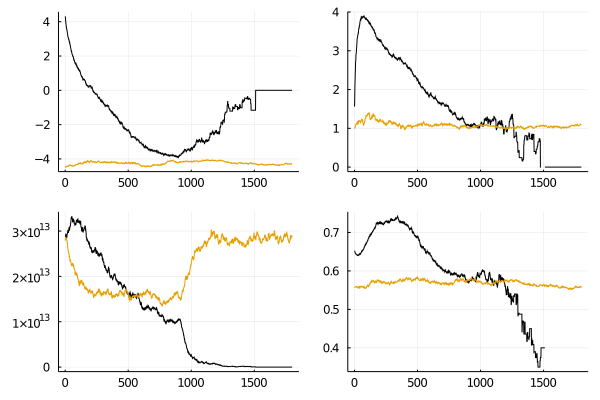

In [ ]:
@load "populaiton1.jld2" pop1
@load "populaiton2.jld2" pop2
using DelimitedFiles
include("AgentBasedSimulations.jl")
T =1800
mu1 = zeros(T)
sigma1 = zeros(T)
SSB1 = zeros(T)
mu2 = zeros(T)
sigma2 = zeros(T)
SSB2 = zeros(T)
He1 = zeros(T)
He2 = zeros(T)
T_stop = 900

for i in 1:T
    if i < T_stop  
        AgentBasedSimulations.time_step!(pop1, pop2, 0.005, 0.3, Sigma)
    else 
        AgentBasedSimulations.time_step!(pop1, pop2, 0.005, 0.0, Sigma)
    end 
    SSB1[i] = AgentBasedSimulations.SSB(pop1)
    mu1[i], sigma1[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
    SSB2[i] = AgentBasedSimulations.SSB(pop2)
    mu2[i], sigma2[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
    He1[i] = AgentBasedSimulations.He(pop1)
    He2[i] = AgentBasedSimulations.He(pop2)
end 



p1 = Plots.plot(mu1, legend = false)
p2 = Plots.plot(sigma1, legend = false)
p3 = Plots.plot(SSB1, legend = false)
p4 = Plots.plot(He1, legend = false)


Plots.plot!(p1,mu2, legend = false)
Plots.plot!(p2,sigma2, legend = false)
Plots.plot!(p3,SSB2, legend = false)
Plots.plot!(p4, He2, legend = false)

plot(p1,p2,p3,p4)

# Test Stochstic Slakin model 

In [1]:
include("AgentBasedSimulations.jl")
include("AgeStructuredModels.jl")
include("DemographicParameters.jl")
include("AgeTraitStructuredModels.jl")
include("StockRecruitCurves.jl")
using Plots
theme(:wong2)

# initialize demographic model - paramters loaded from DemographicParameters.jl 
# see tests in "TestDemographicParametersparams.ipynb"
mod = AgeStructuredModels.init(150,DemographicParameters.Smyth_2016_sr,DemographicParameters.Smyth_2016_survival,
    DemographicParameters.Smyth_16_F_vec)

Rstar = AgeStructuredModels.compute_Rstar(mod)
k = 3.0


# set base genetic paramters
Vle = 1.0
θ = 0.0
s = 0.1
min = -5
max = 20 
Δz = 0.15

# set base paramters for propogated individuals 
μ_im = 5.0
R_im = 0.5 * Rstar  # 50% natrual recrutment 

# initialize coupled genetic-demogrpahic model 
pop = AgeTraitStructuredModels.init(mod,Vle, θ, s, min, max, Δz)
StockRecruitCurves.update_BevetonHolt_k!(pop.ageStructure.SRCurve, k)

3.0

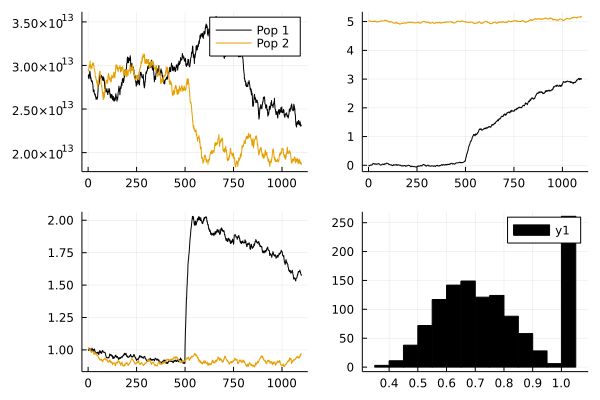

In [2]:
include("AgentBasedSimulations.jl")
pop1 = AgentBasedSimulations.init_stochasticSlakin(mod,s,θ,0.2, 0)
pop2 = AgentBasedSimulations.init_stochasticSlakin(mod,s,5,0.2, 1)

T = 1100
T_start = 500
T_end = 1100

N1 = zeros(T)
N2 = zeros(T)
mu1 = zeros(T)
sigma1 = zeros(T)
mu2 = zeros(T)
sigma2 = zeros(T)
for i in 1:T
    if i < T_start
        #time_step(pop1, pop2, 00, 00, 0.005, 0.)
        AgentBasedSimulations.time_step_slakin!(pop1, pop2, 0.00, 0.0, 0.0, 0.0)
        N1[i] = AgentBasedSimulations.SSB(pop1)
        N2[i] = AgentBasedSimulations.SSB(pop2)
        mu1[i], sigma1[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
        mu2[i], sigma2[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
    elseif i < T_end
        #time_step(pop1, pop2, 10, 60, 0.005, 0.2)
        AgentBasedSimulations.time_step_slakin!(pop1, pop2, 0.00, 0.2, 0.0, 0.0)
        N1[i] = AgentBasedSimulations.SSB(pop1)
        N2[i] = AgentBasedSimulations.SSB(pop2)
        mu1[i], sigma1[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
        mu2[i], sigma2[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
    else
        #time_step(pop1, pop2, 00, 00, 0.005, 0.2)
        AgentBasedSimulations.time_step_slakin!(pop1, pop2, 0.00, 0.0, 0.0, 0.0)
        N1[i] = AgentBasedSimulations.SSB(pop1)
        N2[i] = AgentBasedSimulations.SSB(pop2)
        mu1[i], sigma1[i] = AgentBasedSimulations.trait_distribution_moments(pop1)
        mu2[i], sigma2[i] = AgentBasedSimulations.trait_distribution_moments(pop2)
    end
end 

p1 = Plots.plot(N1, label = "Pop 1")
Plots.plot!(p1, N2, label = "Pop 2")

p2 = Plots.plot(mu1, label = "")
Plots.plot!(p2, mu2, label = "")

p3 = Plots.plot(sigma1, label = "")
Plots.plot!(p3, sigma2, label = "")

p4 = Plots.histogram(AgentBasedSimulations.pedigree_dsn(pop1))

plot(p1,p2,p3,p4)

In [250]:
function time_step(pop1, pop2, N_brood_stock, N_hatchery, p_natrual, p_hathcery)
    J1 = AgentBasedSimulations.reproduction_slakin(pop1, 0)
    J2 = AgentBasedSimulations.reproduction_slakin(pop2, -1.0)
    J2H = AgentBasedSimulations.reproduction_hatchery_slakin(pop2, N_hatchery, N_brood_stock)
    
    J1 = AgentBasedSimulations.selection_slakin(J1,pop1.gradient)
    J2 = AgentBasedSimulations.selection_slakin(J2,pop2.gradient)
    J2H = AgentBasedSimulations.selection_slakin(J2H,pop2.gradient)
    
    J1, J2 = AgentBasedSimulations.immigration!(p_sym,J1,J2)
    J1, J2 = AgentBasedSimulations.directional_immigration!(p_asym,J1, J2H)
    
    J2 = vcat(J2,J2h)
    
    AgentBasedSimulations.update_population!(population1, J1)
    AgentBasedSimulations.update_population!(population2, J2)
end 

time_step (generic function with 1 method)

In [211]:
time_step(pop1, pop2, N_brood_stock, N_hatchery, p_natrual, p_hathcery)

0.9221447822594192